# Data Set Information
- 자전거 예측 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
############# 데이터 불러오기
dat_dir = '../[regression]Bike-sharing/'
data_hour = pd.read_csv(dat_dir+'hour.csv')
data_day = pd.read_csv(dat_dir+'day.csv')

In [3]:
##데이터 내용 확인
data_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
##데이터 내용 확인
data_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
#instant 제거 
data_hour = data_hour.drop('instant',axis=1)
data_hour.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
#instant 제거 
data_day = data_day.drop('instant',axis=1)
data_day.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


##  Explore data set


In [7]:
#check null values
data_hour.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 2.1+ MB


In [8]:
#check null values
data_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(10), object(1)
memory usage: 85.7+ KB


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


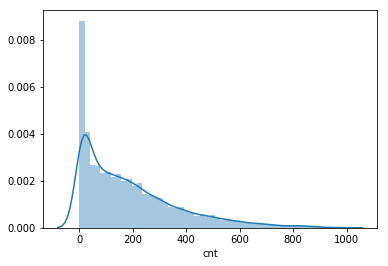

In [9]:
#check skewness of target value

sns.distplot(data_hour['cnt']);

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


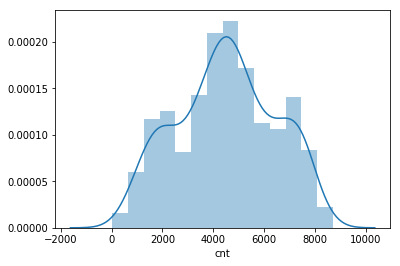

In [10]:
#check skewness of target value

sns.distplot(data_day['cnt']);

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


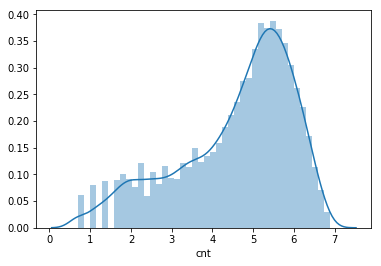

In [11]:
data_hour["cnt"] = np.log1p(data_hour["cnt"])
sns.distplot(data_hour['cnt']);

In [12]:
data_hour

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,2.833213
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,3.713572
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,3.496508
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,2.639057
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,0.693147
5,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,0.693147
6,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,1.098612
7,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,1.386294
8,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,2.197225
9,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,2.708050


In [13]:
# number of training
ntrain = data_hour.shape[0] 
ntrain

17379

In [14]:

############# 데이터 전처리   x , y  분리 
# split x variable to y variable
#x = data_hour.loc[:,data_hour.columns != 'cnt']
#y = data_hour.cnt
x = data_hour.drop(['casual','registered','cnt'], axis=1)
y = data_hour.cnt

In [15]:
x

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000
5,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896
6,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000
7,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000
8,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000
9,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000


In [16]:
y

0        2.833213
1        3.713572
2        3.496508
3        2.639057
4        0.693147
5        0.693147
6        1.098612
7        1.386294
8        2.197225
9        2.708050
10       3.610918
11       4.043051
12       4.442651
13       4.553877
14       4.672829
15       4.709530
16       4.543295
17       4.219508
18       3.583519
19       3.637586
20       3.610918
21       3.555348
22       3.367296
23       3.688879
24       2.890372
25       2.890372
26       2.302585
27       1.945910
28       1.386294
29       1.098612
           ...   
17349    4.836282
17350    4.634729
17351    4.290459
17352    3.871201
17353    3.610918
17354    3.912023
17355    3.555348
17356    2.995732
17357    2.484907
17358    0.693147
17359    1.386294
17360    2.302585
17361    3.713572
17362    4.454347
17363    5.283204
17364    5.062595
17365    4.795791
17366    5.062595
17367    5.416100
17368    5.318120
17369    5.513429
17370    5.755742
17371    5.370638
17372    5.105945
17373    4

In [17]:
data_hour.shape

(17379, 16)

# casual registered 별 차이 인지 +1 해서 로그를 취한방법도 있음 

## 2. Feature Engineering


In [18]:
#import datetime
#from datetime import datetime

In [19]:
#data_hour['date']  = data_hour.datetime.apply(lambda x: x.split()[0])
#data_hour['hour'] = data_hour.datetime.apply(lambda x: x.split()[1].split(':')[0])

In [20]:
# train/test 나누기
m = (int)(len(x) * 0.8)
m
train_x = x[:m]
train_y = y[:m]
test_x = x[m:]
test_y = y[m:]
train_x.shape, test_x.shape

((13903, 13), (3476, 13))

## check skewness

In [21]:
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from scipy.stats import norm, skew 

In [22]:
#get the numeric values
numeric_features = data_hour.dtypes[data_hour.dtypes != "object"].index
numeric_features

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [23]:
# Check the skew of all numerical features
skewed_feats = data_hour[numeric_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness


Skew in numerical features: 



,Skew
holiday,5.638051
casual,2.499021
registered,1.557770
weathersit,1.227941
windspeed,0.574856
weekday,-0.002998
season,-0.005415
temp,-0.006020
mnth,-0.009252
yr,-0.010242


In [24]:
skewness = skewness[abs(skewness)>0.7]
skewness

,Skew
holiday,5.638051
casual,2.499021
registered,1.557770
weathersit,1.227941
windspeed,NaN
weekday,NaN
season,NaN
temp,NaN
mnth,NaN
yr,NaN


## check correlation


In [25]:
corr = data_hour.corr(method='pearson').drop(['cnt']).sort_values('cnt', ascending=False)['cnt']
corr 

registered    0.792535
casual        0.585639
hr            0.564470
temp          0.388694
atemp         0.385523
yr            0.168902
season        0.167198
windspeed     0.115275
mnth          0.114360
weekday       0.029496
workingday    0.004339
holiday      -0.026007
weathersit   -0.121874
hum          -0.340790
Name: cnt, dtype: float64

In [26]:
import seaborn as sns


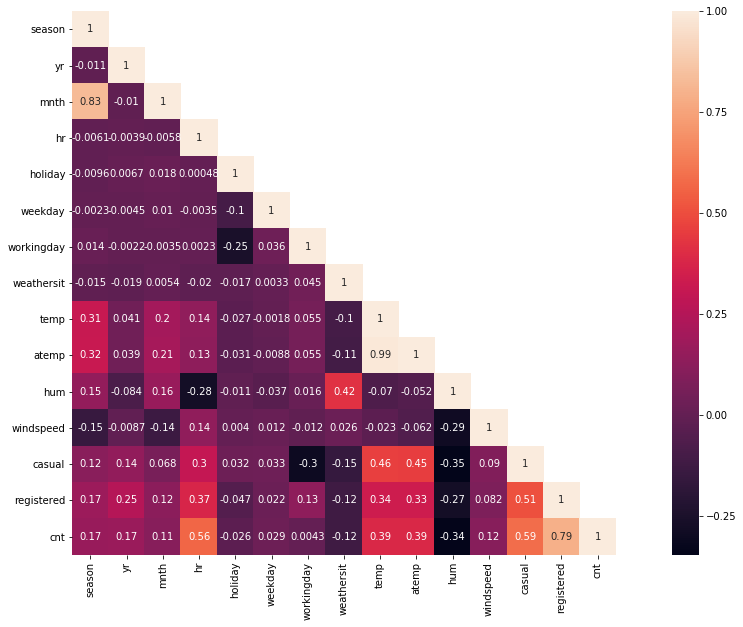

In [27]:
corrMat = data_hour.corr()
mask = np.array(corrMat)
mask[np.tril_indices_from(mask)] = False
fig, ax= plt.subplots(figsize=(20, 10))
sns.heatmap(corrMat, mask=mask,vmax=1., square=True,annot=True)

count(target variable) has lot of correlation with "humidity, temp, atemp"

temp - temperature in Celsius
atemp - "feels like" temperature in Celsius
humidity - relative humidity
즉 기온 관련 feature와 highly correlated
하지만 temp와 atemp끼리도 correaltion이 높기 때문에 둘 중 하나만 남겨야? vif와 p-value 확인해보자

In [28]:
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [29]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13903 entries, 0 to 13902
Data columns (total 13 columns):
dteday        13903 non-null object
season        13903 non-null int64
yr            13903 non-null int64
mnth          13903 non-null int64
hr            13903 non-null int64
holiday       13903 non-null int64
weekday       13903 non-null int64
workingday    13903 non-null int64
weathersit    13903 non-null int64
temp          13903 non-null float64
atemp         13903 non-null float64
hum           13903 non-null float64
windspeed     13903 non-null float64
dtypes: float64(4), int64(8), object(1)
memory usage: 1.4+ MB


In [30]:
#
train_x=train_x.drop(['atemp','dteday'], axis=1)
result = sm.OLS(train_y, train_x).fit()


In [31]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 2.167e+04
Date:                Thu, 18 Oct 2018   Prob (F-statistic):               0.00
Time:                        10:30:17   Log-Likelihood:                -21135.
No. Observations:               13903   AIC:                         4.229e+04
Df Residuals:                   13892   BIC:                         4.237e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
season         0.2091      0.018     11.396      0.0

In [32]:
# train/test 나누기

#m = (int)(len(x) * 0.8)
#m

#train_x = x[:m]
#train_y = y[:m]
#test_x = x[m:]
#test_y = y[m:]
#train_x.shape, test_x.shape

In [33]:
data_hour.columns

Index(['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [34]:
features = "atemp+holiday+hum+season+temp+weathersit+windspeed+workingday+hr+weekday+mnth"

In [35]:
# Break into left and right hand side; y and X
y, X = dmatrices("cnt ~" + features, data=data_hour, return_type="dataframe")

# For each Xi, calculate VIF
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Fit X to y
result = sm.OLS(y, X).fit()

In [36]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     1371.
Date:                Thu, 18 Oct 2018   Prob (F-statistic):               0.00
Time:                        10:30:20   Log-Likelihood:                -25295.
No. Observations:               17379   AIC:                         5.061e+04
Df Residuals:                   17367   BIC:                         5.071e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8940      0.050     57.314      0.0

In [37]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [38]:
vif.round(1)


,VIF Factor,features
0,41.2,Intercept
1,44.0,atemp
2,1.1,holiday
3,1.5,hum
4,3.5,season
5,43.7,temp
6,1.3,weathersit
7,1.2,windspeed
8,1.1,workingday
9,1.1,hr


In [39]:
train = data_hour[:ntrain]
test = data_hour[ntrain:]

In [40]:
train["cnt"]=y

In [41]:
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from scipy.stats import norm, skew 

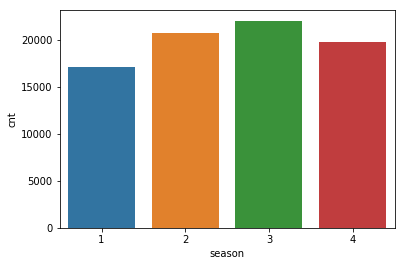

In [42]:
group_season = data_hour.groupby(['season'])['cnt'].sum().reset_index()
ax = sns.barplot(x = group_season['season'], y = group_season['cnt'])
ax.set(xlabel='season', ylabel='cnt')
plt.show()

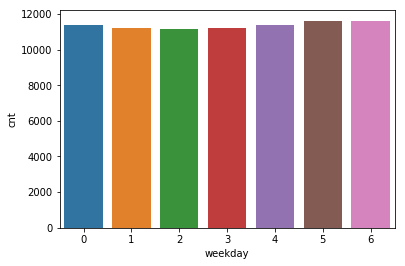

In [43]:
group_dow = data_hour.groupby(['weekday'])['cnt'].sum().reset_index()
ax = sns.barplot(x = group_dow['weekday'], y = group_dow['cnt'])
ax.set(xlabel='weekday', ylabel='cnt')
plt.show()

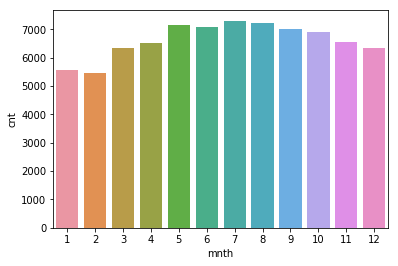

In [44]:
group_mn = data_hour.groupby(['mnth'])['cnt'].sum().reset_index()
ax = sns.barplot(x = group_mn['mnth'], y = group_mn['cnt'])
ax.set(xlabel='mnth', ylabel='cnt')
plt.show()

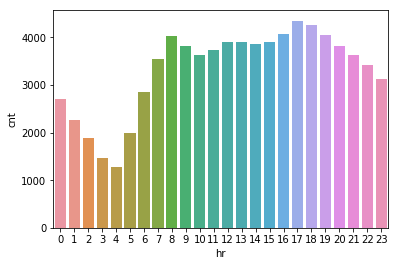

In [45]:
group_hr = data_hour.groupby(['hr'])['cnt'].sum().reset_index()
ax = sns.barplot(x = group_hr['hr'], y = group_hr['cnt'])
ax.set(xlabel='hr', ylabel='cnt')
plt.show()

In [46]:
#group_hr = data_hour.groupby(['hr','workingday'],axis=1)['cnt'].sum().reset_index()
#ax = sns.barplot(x = group_hr['hr','workingday'], y = group_hr['cnt'])
#ax.set(xlabel='hr', ylabel='cnt')
#plt.show()


#data_hour_temp= data_hour
#data_hour_temp.set_index(['hr', 'workingday'], inplace=True)
#data_hour_temp.groupby(level=[0,1])['cnt'].sum().reset_index()
#import pandas
#df = pandas.DataFrame.from_dict(
#     {
#      'category': {0: 'Love', 1: 'Love', 2: 'Fashion', 3: 'Fashion', 4: 'Hair', 5: 'Movies', 6: 'Movies', 7: 'Health', 8: 'Health', 9: 'Celebs', 10: 'Celebs', 11: 'Travel', 12: 'Weightloss', 13: 'Diet', 14: 'Bags'}, 
#      'impressions': {0: 380, 1: 374242, 2: 197, 3: 13363, 4: 4, 5: 189, 6: 60632, 7: 269, 8: 40189, 9: 138, 10: 66590, 11: 2227, 12: 22668, 13: 21707, 14: 229}, 
#      'date': {0: '2013-11-04', 1: '2013-11-04', 2: '2013-11-04', 3: '2013-11-04', 4: '2013-11-04', 5: '2013-11-04', 6: '2013-11-04', 7: '2013-11-04', 8: '2013-11-04', 9: '2013-11-04', 10: '2013-11-04', 11: '2013-11-04', 12: '2013-11-04', 13: '2013-11-04', 14: '2013-11-04'}, 'cpc_cpm_revenue': {0: 0.36823, 1: 474.81522000000001, 2: 0.19434000000000001, 3: 18.264220000000002, 4: 0.00080000000000000004, 5: 0.23613000000000001, 6: 81.391139999999993, 7: 0.27171000000000001, 8: 51.258200000000002, 9: 0.11536, 10: 83.966859999999997, 11: 3.43248, 12: 31.695889999999999, 13: 28.459320000000002, 14: 0.43524000000000002}, 'clicks': {0: 0, 1: 183, 2: 0, 3: 9, 4: 0, 5: 1, 6: 20, 7: 0, 8: 21, 9: 0, 10: 32, 11: 1, 12: 12, 13: 9, 14: 2}, 'size': {0: '300x250', 1: '300x250', 2: '300x250', 3: '300x250', 4: '300x250', 5: '300x250', 6: '300x250', 7: '300x250', 8: '300x250', 9: '300x250', 10: '300x250', 11: '300x250', 12: '300x250', 13: '300x250', 14: '300x250'}
#     }
# )
# df.set_index(['date', 'category'], inplace=True)
# df.groupby(level=[0,1]).sum()


#group_hr = data_hour.groupby(['hr','workingday']),as_index=False)[].ag

#print (df.groupby(['InvoiceNo','CustomerID','Country'], as_index=False)['NoStockCode','Description','Quantity'].agg(lambda x: list(x)))


#ax = sns.barplot(x = group_hr['hr'], y = group_hr['cnt'])
#ax.set(xlabel='hr', ylabel='cnt')
#plt.show()

#data_hour_worlingday = []
# cnt =0
# data_hour_workday_0 =[]
# data_hour_workday_1 =[]
# #data_hour.iloc[100].workingday
# for  da in data_hour:
#     if data_hour.iloc[cnt].workingday=='1':
#         data_hour_workday_1.append(data_hour.iloc[cnt])
#     else :
#         data_hour_workday_0.append(data_hour.iloc[cnt])        
#     cnt=cnt+1
    
# data_hour_workday_1    
#for i in range(4, 8):
#    print(i)    
#data_hour.iloc[0]
#for data in data_hour:
#    if data_hour.workingday ='1':
#        data_hour_temp.append()


#data_hour.columns
#for dat in data_hour:
#    
#    print(data_hour[cnt])

#group_hr = data_hour.groupby(['workingday'])['cnt'].sum().reset_index()
#ax = sns.barplot(x = group_hr['workingday'], y = group_hr['cnt'])
#ax.set(xlabel='workingday', ylabel='cnt')
#plt.show()


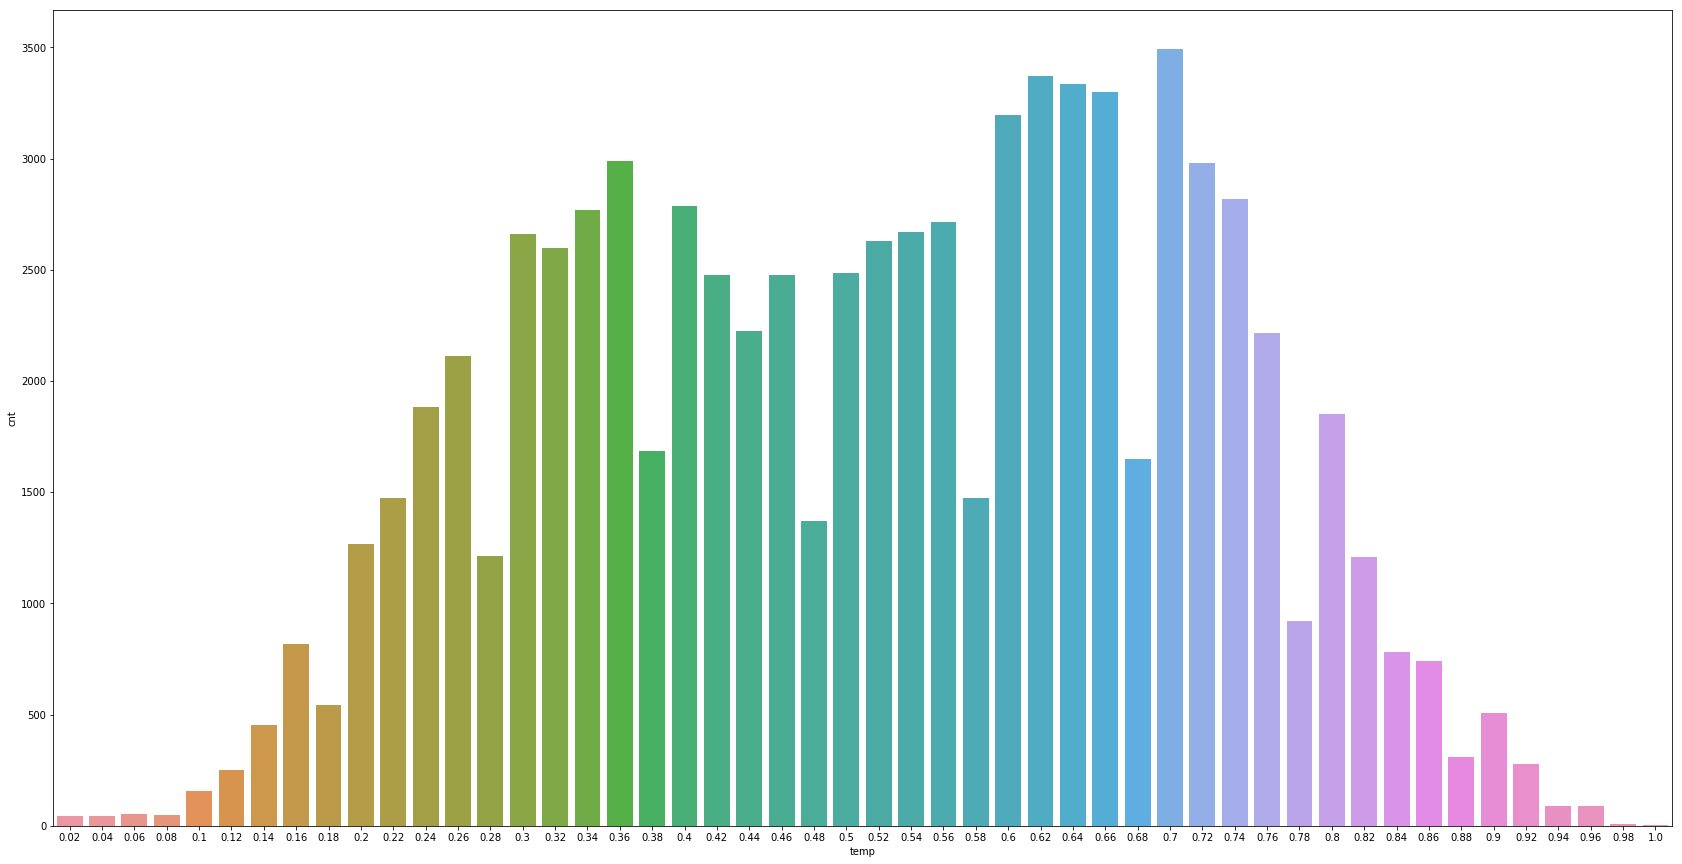

In [47]:
plt.figure(figsize=(29,15))
group_season = train.groupby(['temp'])['cnt'].sum().reset_index()
ax = sns.barplot(x = group_season['temp'], y = group_season['cnt'])
ax.set(xlabel='temp', ylabel='cnt')
plt.show()

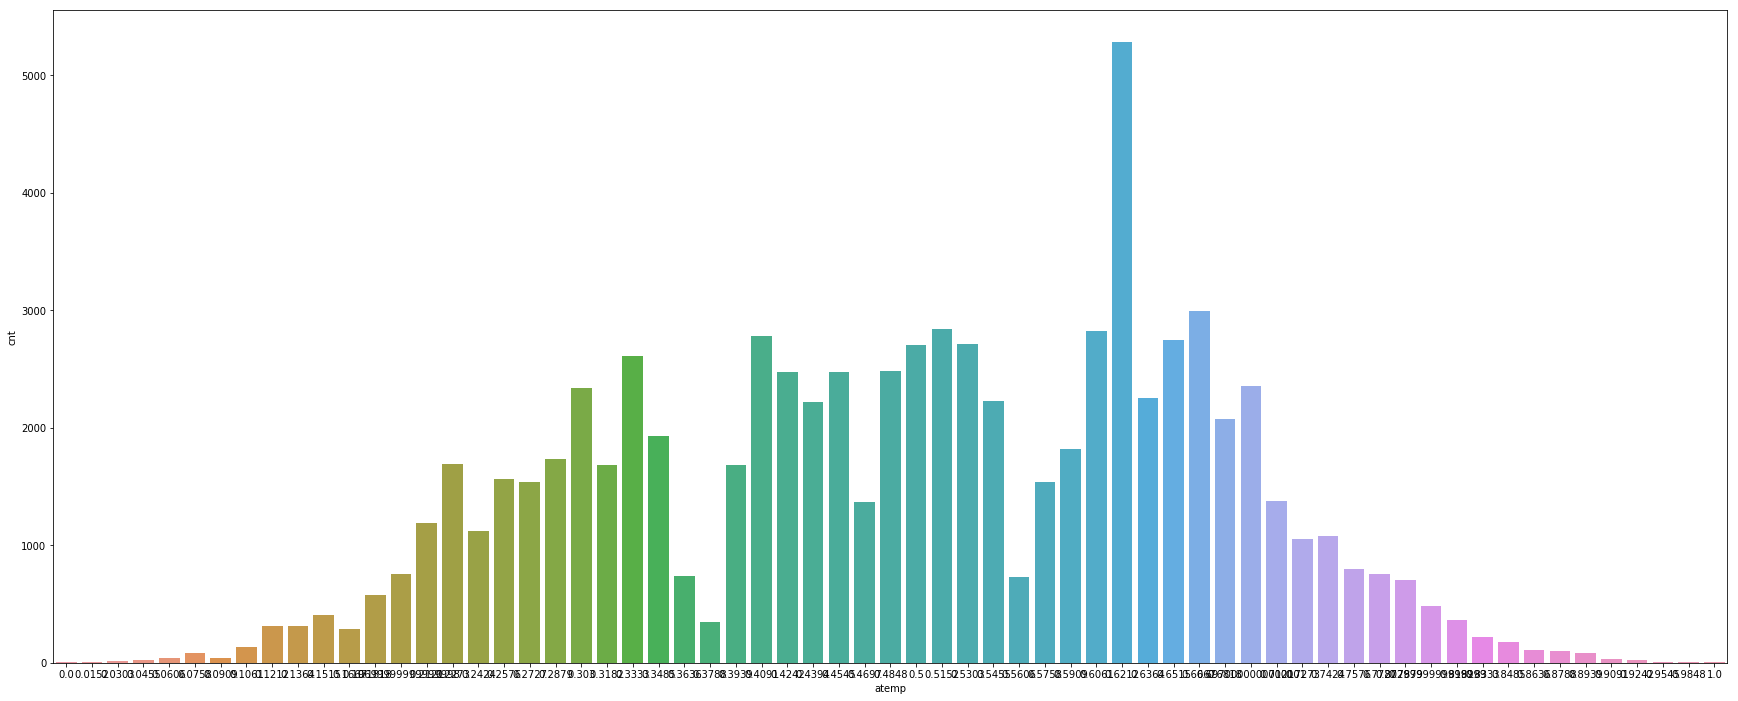

In [48]:
plt.figure(figsize=(30,12))
group_season = train.groupby(['atemp'])['cnt'].sum().reset_index()
ax = sns.barplot(x = group_season['atemp'], y = group_season['cnt'])
ax.set(xlabel='atemp', ylabel='cnt')
plt.show()

In [49]:
data_hour["temp"].value_counts()


0.62    726
0.66    693
0.64    692
0.70    690
0.60    675
0.36    671
0.34    645
0.30    641
0.40    614
0.32    611
0.56    579
0.72    570
0.54    569
0.26    559
0.46    559
0.52    556
0.42    548
0.50    531
0.24    522
0.74    516
0.44    507
0.22    421
0.76    396
0.38    372
0.20    354
0.68    349
0.80    325
0.58    305
0.28    301
0.48    288
0.16    230
0.82    213
0.78    169
0.18    155
0.14    138
0.84    138
0.86    131
0.90     90
0.12     76
0.88     53
0.10     51
0.92     49
0.94     17
0.08     17
0.02     17
0.04     16
0.96     16
0.06     16
0.98      1
1.00      1
Name: temp, dtype: int64

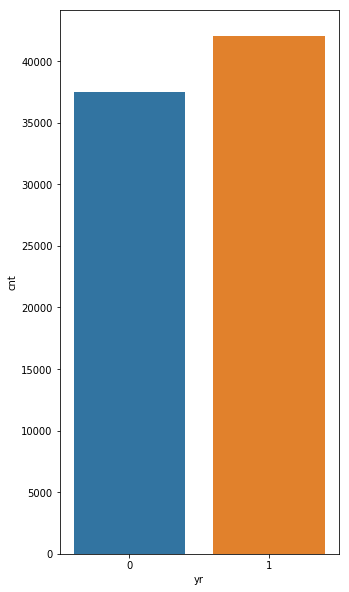

In [50]:
plt.figure(figsize=(5,10))
group_season = train.groupby(['yr'])['cnt'].sum().reset_index()
ax = sns.barplot(x = group_season['yr'], y = group_season['cnt'])
ax.set(xlabel='yr', ylabel='cnt')
plt.show()

In [51]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC, LinearRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
#from xgboost import XGBRegressor
#import xgboost as xgb
#import lightgbm as lgb
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer
import sklearn.preprocessing as preprocessing
#from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [52]:
from sklearn import metrics
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [68]:
def rmsle(y, y_,convertExp=True):
    if convertExp:
        y = np.exp(y),
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [54]:
train_x.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0
4,1,0,1,4,0,6,0,1,0.24,0.75,0.0


In [55]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [56]:
#print(rmsle(train_y, lModel_train_pred))

In [57]:
def scores(train_y,y_train_pred, str_type) :
    
    #y_log_exp = np.exp(y_train_pred)

    mse_train = mean_squared_error(train_y, y_train_pred)
    print("mse_",str_type,": %.2f"%(mse_train))

    mae_train = mean_absolute_error(train_y, y_train_pred)
    print("mae_",str_type,": %.2f"%(mae_train))
    
    mape_train = mean_absolute_percentage_error(train_y, y_train_pred)
    print("mape",str_type,": %.2f"%(mape_train))
    
    r2_train = r2_score(train_y, y_train_pred)
    print("r2_",str_type,": %.2f"%(r2_train))
    

In [58]:
lModel = LinearRegression()


test_x=test_x.drop(['dteday'],axis=1)
test_x=test_x.drop(['atemp'],axis=1)

In [59]:
print(train_x.columns)
print(test_x.columns)

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed'],
      dtype='object')
Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed'],
      dtype='object')


In [60]:
train_x.shape , test_x.shape , train_y.shape , test_y.shape

((13903, 11), (3476, 11), (13903,), (3476,))

In [61]:
# Train the model
lModel.fit(train_x, train_y)
lModel_train_pred = lModel.predict(train_x)



print ("RMSLE Value ForLinearRegression: ")
#print(rmsle(train_y, KRR_train_pred))
print(scores(train_y, lModel_train_pred,'train'))


lModel_test_pred = lModel.predict(test_x)

print(scores(test_y, lModel_test_pred,'test'))

RMSLE Value ForLinearRegression: 
mse_ train : 1.04
mae_ train : 0.81
mape train : 27.27
r2_ train : 0.48
None
mse_ test : 1.05
mae_ test : 0.82
mape test : 23.47
r2_ test : 0.47
None


In [70]:
print(rmsle(train_y, lModel_train_pred))

print(rmsle(test_y, lModel_test_pred))

0.9777277981990914
0.9959367814589084


In [62]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5) #kernel = 'rbf' , 'sigmoid' 


In [63]:
KRR.fit(train_x,train_y)
KRR_train_pred = KRR.predict(train_x)
#KRR_pred = np.expm1(KRR.predict(test.values))
print ("RMSLE Value For KRR Regression: ")
#print(rmsle(train_y, KRR_train_pred))
print(scores(train_y, KRR_train_pred,'train'))



KRR_testn_pred = KRR.predict(test_x)

print(scores(test_y, KRR_testn_pred,'test'))

RMSLE Value For KRR Regression: 
mse_ train : 0.74
mae_ train : 0.64
mape train : 22.91
r2_ train : 0.63
None
mse_ test : 0.85
mae_ test : 0.71
mape test : 19.01
r2_ test : 0.57
None


In [71]:
print(rmsle(train_y, KRR_train_pred))

print(rmsle(test_y, KRR_testn_pred))

0.8162789632241364
0.894511779089936


In [64]:
GBoost = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=4,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=15, min_samples_split=10,
             min_weight_fraction_leaf=0.0, n_estimators=3000,
             presort='auto', random_state=5, subsample=1.0, verbose=0,
             warm_start=False)

In [65]:
GBoost.fit(train_x,train_y)
GBoost_train_pred = GBoost.predict(train_x)
#GBoost_pred = np.expm1(GBoost.predict(test.values))
print ("RMSLE Value For GBoost Regression: ")
#print(rmsle(train_y, GBoost_train_pred))
print(scores(train_y, GBoost_train_pred,'train'))


GBoost_test_pred = GBoost.predict(test_x)

print(scores(test_y, GBoost_test_pred,'test'))

RMSLE Value For GBoost Regression: 
mse_ train : 0.06
mae_ train : 0.16
mape train : 5.60
r2_ train : 0.97
None
mse_ test : 0.12
mae_ test : 0.23
mape test : 6.49
r2_ test : 0.94
None


In [72]:
print(rmsle(train_y, GBoost_train_pred))

print(rmsle(test_y, GBoost_test_pred))

0.22407720904336687
0.3281043358886524


In [90]:
# model_svr = SVR(C=1, cache_size=200, coef0=0, degree=3, epsilon=0.1, gamma='auto',
#   kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
# model_svr.fit(train_x, train_y)
# svr_train_pred = model_svr.predict(train_x)

# #GBoost_pred = np.expm1(GBoost.predict(test.values))
# print ("RMSLE Value For SVR Regression: ")
# #print(rmsle(train_y, GBoost_train_pred))
# print(scores(train_y, svr_train_pred,'train'))


# svr_test_pred = model_svr.predict(test_x)

# print(scores(test_y, svr_test_pred,'test'))


In [ ]:
# train_x.head()
# train_y.head()


In [66]:
regr = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=60, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [67]:
regr.fit(train_x, train_y)
regr_train_pred = regr.predict(train_x)

print ("RMSLE Value For RandomForest Regression: ")


print(scores(train_y, regr_train_pred,'train'))

regr_test_pred = regr.predict(test_x)
print(scores(test_y, regr_test_pred,'test'))

RMSLE Value For RandomForest Regression: 
mse_ train : 0.01
mae_ train : 0.08
mape train : 2.73
r2_ train : 0.99
None
mse_ test : 0.16
mae_ test : 0.28
mape test : 7.62
r2_ test : 0.92
None


In [73]:
print(rmsle(train_y, regr_train_pred))

print(rmsle(test_y, regr_test_pred))

0.11032544314260004
0.3882540896063854


In [ ]:
# data_hour.columns

In [ ]:


# ####### 데이터 변경
# xx = data_hour.drop(['dteday','season','yr','atemp','cnt'],axis=1)
# xx= preprocessing.minmax_scale(xx)

# yy = data_hour.cnt



# result = sm.OLS(yy, xx).fit()
# print(result.summary())